### Deliverable 3: Preprocessing the Data for a Neural Network Attempt 3

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'

for col in application_df.columns:
    if 'EIN'  in col:
        del application_df[col]

#for col in application_df.columns:
#    if 'NAME'  in col:
#        del application_df[col]

In [32]:
#column check

for col_name in application_df.columns: 
    print(col_name)

NAME
APPLICATION_TYPE
AFFILIATION
CLASSIFICATION
USE_CASE
ORGANIZATION
STATUS
INCOME_AMT
SPECIAL_CONSIDERATIONS
ASK_AMT
IS_SUCCESSFUL


In [34]:
#Column rename
application_df.columns = ['Name','Application_Type', 'Affiliation', 'Classification', 'Use_Case', 
                 'Organization', 'Status', 'Income_Amount', 'Special_Considerations',
                'Ask_Amount', 'Is_Successful']

In [35]:
for colName in application_df.columns:
    print(colName)

Name
Application_Type
Affiliation
Classification
Use_Case
Organization
Status
Income_Amount
Special_Considerations
Ask_Amount
Is_Successful


In [36]:
# Look at NAME value counts for binning
# Look at NAME value counts for binning
application_df.Name.value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: Name, Length: 19568, dtype: int64

In [42]:
# Determine the number of unique values in each column
nun = application_df.nunique()
nun

Name                      19568
Application_Type             17
Affiliation                   6
Classification               71
Use_Case                      5
Organization                  4
Status                        2
Income_Amount                 9
Special_Considerations        2
Ask_Amount                 8747
Is_Successful                 2
dtype: int64

In [48]:
# Look at APPLICATION_TYPE value counts for binning
vc=application_df.Name.value_counts()
vc

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: Name, Length: 19568, dtype: int64

<AxesSubplot:ylabel='Density'>

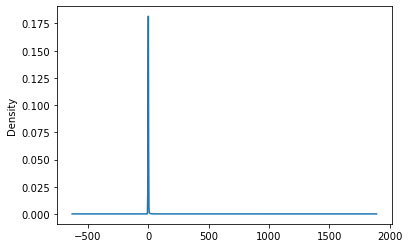

In [49]:
# Visualize the value counts of APPLICATION_TYPE
vc.plot.density()

In [50]:
# Determine which values to replace if counts are less than ...?
replace=list(vc[vc < 50].index)

# Replace in dataframe
for name in replace:
    application_df.Name=application_df.Name.replace(name,"Other")
    
# Check to make sure binning was successful
application_df.Name.value_counts()

Other                                                                 24545
PARENT BOOSTER USA INC                                                 1260
TOPS CLUB INC                                                           765
UNITED STATES BOWLING CONGRESS INC                                      700
WASHINGTON STATE UNIVERSITY                                             492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                         408
PTA TEXAS CONGRESS                                                      368
SOROPTIMIST INTERNATIONAL OF THE AMERICAS INC                           331
ALPHA PHI SIGMA                                                         313
TOASTMASTERS INTERNATIONAL                                              293
MOST WORSHIPFUL STRINGER FREE AND ACCEPTED MASONS                       287
LITTLE LEAGUE BASEBALL INC                                              277
INTERNATIONAL ASSOCIATION OF LIONS CLUBS                                266
MOMS CLUB   

In [52]:
# Determine the number of unique values in each column
nun = application_df.nunique()
nun

Name                        52
Application_Type            17
Affiliation                  6
Classification              71
Use_Case                     5
Organization                 4
Status                       2
Income_Amount                9
Special_Considerations       2
Ask_Amount                8747
Is_Successful                2
dtype: int64

In [55]:
# Look at APPLICATION value counts for binning
vc=application_df.Application_Type.value_counts()
vc

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: Application_Type, dtype: int64

<AxesSubplot:ylabel='Density'>

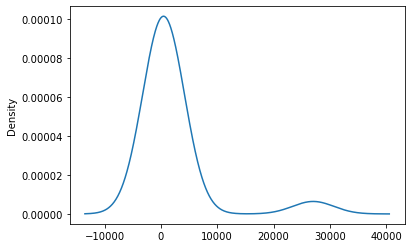

In [56]:
# Visualize the value counts of CLASSIFICATION
vc.plot.density()

In [57]:
# Determine which values to replace if counts are less than ..?
replace=list(vc[vc < 500].index)

# Replace in dataframe
for app in replace:
    application_df.Classification = application_df.Classification.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.Classification.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: Classification, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

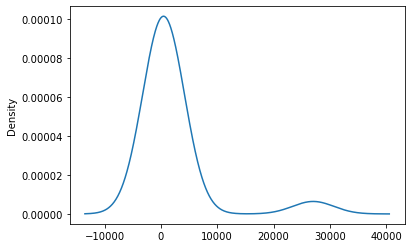

In [59]:
# Visualize the value counts of CLASSIFICATION
vc.plot.density()

In [61]:
# Determine which values to replace if counts are less than ..? <1000
re=list(vc[vc < 1000].index)

# Replace in dataframe
for app in re:
    application_df.Classification = application_df.Classification.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.Classification.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: Classification, Length: 71, dtype: int64

In [62]:
# Generate our categorical variable lists
appCat=application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [63]:
# Create a OneHotEncoder instance
x = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encodeDF=pd.DataFrame(x.fit_transform(application_df[appCat]))

# Add the encoded variable names to the dataframe
encodeDF.columns = x.get_feature_names_out(appCat)
encodeDF.head()

,Name_AIR FORCE ASSOCIATION,Name_ALPHA PHI SIGMA,Name_AMATEUR ATHLETIC UNION OF THE UNITED STATES,Name_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,Name_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,Name_CALIFORNIA GARDEN CLUBS INC,Name_CISD EDUCATIONAL SUPPORT GROUPS INC,Name_CIVITAN INTERNATIONAL,Name_CLEARCREEK I S D SUPPORT GROUPS,Name_DEMOLAY INTERNATIONAL,...,Income_Amount_1-9999,Income_Amount_10000-24999,Income_Amount_100000-499999,Income_Amount_10M-50M,Income_Amount_1M-5M,Income_Amount_25000-99999,Income_Amount_50M+,Income_Amount_5M-10M,Special_Considerations_N,Special_Considerations_Y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
# Merge one-hot encoded features and drop the originals
application_df=application_df.merge(encodeDF, left_index=True, right_index=True)
application_df=application_df.drop(appCat, 1)
application_df.head()

C:\Users\rashi\AppData\Local\Temp\ipykernel_15416\3334480245.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df=application_df.drop(appCat, 1)


,Status,Ask_Amount,Is_Successful,Name_AIR FORCE ASSOCIATION,Name_ALPHA PHI SIGMA,Name_AMATEUR ATHLETIC UNION OF THE UNITED STATES,Name_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,Name_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,Name_CALIFORNIA GARDEN CLUBS INC,Name_CISD EDUCATIONAL SUPPORT GROUPS INC,...,Income_Amount_1-9999,Income_Amount_10000-24999,Income_Amount_100000-499999,Income_Amount_10M-50M,Income_Amount_1M-5M,Income_Amount_25000-99999,Income_Amount_50M+,Income_Amount_5M-10M,Special_Considerations_N,Special_Considerations_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [65]:
application_df.head()

,Status,Ask_Amount,Is_Successful,Name_AIR FORCE ASSOCIATION,Name_ALPHA PHI SIGMA,Name_AMATEUR ATHLETIC UNION OF THE UNITED STATES,Name_AMATEUR ATHLETIC UNION OF THE UNITED STATES INC,Name_AMERICAN ASSOCIATION OF UNIVERSITY WOMEN,Name_CALIFORNIA GARDEN CLUBS INC,Name_CISD EDUCATIONAL SUPPORT GROUPS INC,...,Income_Amount_1-9999,Income_Amount_10000-24999,Income_Amount_100000-499999,Income_Amount_10M-50M,Income_Amount_1M-5M,Income_Amount_25000-99999,Income_Amount_50M+,Income_Amount_5M-10M,Special_Considerations_N,Special_Considerations_Y
0,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [66]:
# Split our preprocessed data into our features and target arrays
Y=application_df["Is_Successful"].values
X=application_df.drop(["Is_Successful"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=78)

C:\Users\rashi\AppData\Local\Temp\ipykernel_15416\298532071.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=application_df.drop(["Is_Successful"],1).values


In [67]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [68]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
numInput=len(X_train[0])
layer1=150
layer2=50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=layer1, input_dim=numInput, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 150)               25350     
                                                                 
 dense_4 (Dense)             (None, 50)                7550      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 32,951
Trainable params: 32,951
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Create callback that saves every 5 epochs
#def checkpoint path +fileNames
os.makedirs("checkpoints/",exist_ok=True)
checkpointPath = "checkpoints/weights.{epoch:02d}.hdf5"

In [71]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


#create callback
cpCallback = ModelCheckpoint(
    filepath=checkpointPath,
    verbose=1,
    save_weights_only=True,
    save_freq=4000)

# Train the model
fitModel = nn.fit(X_train,Y_train,epochs=200,callbacks=[cpCallback])


# Evaluate the model using the test data
modelLoss, modelAccuracy = nn.evaluate(X_test,Y_test,verbose=2)
print(f"Loss: {modelLoss}, Accuracy: {modelAccuracy}")

Epoch 1/200
804/804 [==============================] - 3s 3ms/step - loss: 75692.6250 - accuracy: 0.5004
Epoch 2/200
804/804 [==============================] - 2s 3ms/step - loss: 85345.5391 - accuracy: 0.5023
Epoch 3/200
804/804 [==============================] - 2s 2ms/step - loss: 20692.8340 - accuracy: 0.5015
Epoch 4/200
804/804 [==============================] - 2s 2ms/step - loss: 23573.2617 - accuracy: 0.4993
Epoch 5/200
765/804 [===========================>..] - ETA: 0s - loss: 45907.9961 - accuracy: 0.5087
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 44363.4688 - accuracy: 0.5104
Epoch 6/200
804/804 [==============================] - 2s 3ms/step - loss: 15979.2666 - accuracy: 0.4949
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 4133.2324 - accuracy: 0.5331
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 15572.5742 - accuracy: 0.5165
Epoch 9/200
804/804

804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 65/200
534/804 [==================>...........] - ETA: 0s - loss: 0.6915 - accuracy: 0.5305
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 66/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 67/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 68/200
804/804 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 69/200
804/804 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 70/200
521/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5356
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 71/200
804/804 

804/804 [==============================] - 3s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 127/200
804/804 [==============================] - 3s 3ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 128/200
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 129/200
804/804 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.5321
Epoch 130/200
272/804 [=========>....................] - ETA: 1s - loss: 0.6915 - accuracy: 0.5304
Epoch 130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 131/200
804/804 [==============================] - 3s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 132/200
804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 133/200
804/804 [==============================] - 3s 4ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 134/200
804/804 [==========================

804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 190/200
 41/804 [>.............................] - ETA: 1s - loss: 0.6922 - accuracy: 0.5236
Epoch 190: saving model to checkpoints\weights.190.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 191/200
804/804 [==============================] - 3s 4ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 192/200
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 193/200
804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 194/200
804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 195/200
 23/804 [..............................] - ETA: 1s - loss: 0.6927 - accuracy: 0.5217
Epoch 195: saving model to checkpoints\weights.195.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 196/2

In [72]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,Y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6911 - accuracy: 0.5332 - 679ms/epoch - 3ms/step
Loss: 0.6910688877105713, Accuracy: 0.5331778526306152


In [73]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity3.h5")